## IMDB Subwords 8K with 1D Convolutional Layer


In [0]:
!pip install tensorflow==2.0.0

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
# Get the data

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [7]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 282s 721ms/step - loss: 0.4440 - accuracy: 0.7859 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 286s 730ms/step - loss: 0.2265 - accuracy: 0.9172 - val_loss: 0.3334 - val_accuracy: 0.8681
Epoch 3/10
391/391 [==============================] - 286s 731ms/step - loss: 0.1723 - accuracy: 0.9362 - val_loss: 0.3343 - val_accuracy: 0.8724
Epoch 4/10
391/391 [==============================] - 286s 731ms/step - loss: 0.1397 - accuracy: 0.9501 - val_loss: 0.3596 - val_accuracy: 0.8683
Epoch 5/10
391/391 [==============================] - 293s 749ms/step - loss: 0.1102 - accuracy: 0.9622 - val_loss: 0.4478 - val_accuracy: 0.8617
Epoch 6/10
391/391 [==============================] - 300s 768ms/step - loss: 0.0945 - accuracy: 0.9670 - val_loss: 0.5240 - val_accuracy: 0.8583
Epoch 7/10
391/391 [==============================] - 301s 770ms/step - loss: 0.0738 - accuracy: 0.9763 - val_loss: 

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.grid()
    plt.show()

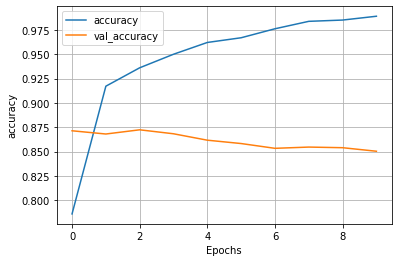

In [9]:
plot_graphs(history, 'accuracy')

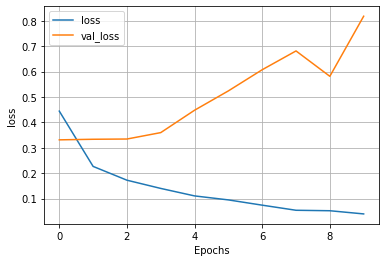

In [10]:
plot_graphs(history, 'loss')